<a href="https://colab.research.google.com/github/Shanmathim-work/data_analyst/blob/main/barber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os

path = '/content/drive/MyDrive/dataanalyst'
os.listdir(path)

['Copy of barber_shop_dataset(1).xlsx', 'barber_shop_with_strategies.csv']

In [9]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataanalyst/Copy of barber_shop_dataset(1).xlsx'
df = pd.read_excel(file_path)

print(" Dataset loaded successfully!")
print(df.head())

 Dataset loaded successfully!
         Date  Day_Type Day_of_Week  Turnover (₹)         Service  \
0  2025-07-01      Weak     Tuesday           350         Cutting   
1  2025-07-02    Normal   Wednesday           599         Cutting   
2  2025-07-03    Normal    Thursday           579  Cutting+Saving   
3  2025-07-04      Weak      Friday           262         Cutting   
4  2025-07-05  Moderate    Saturday          1474          Facial   

  Customer_Type        Gender Age_Group        Visit_Time Notes  
0       Regular          Male     25-40  Evening (5-7 PM)   NaN  
1       Regular          Male     25-40  Morning (7-9 AM)   NaN  
2       Regular          Male     25-40  Evening (5-7 PM)   NaN  
3       Regular          Male     25-40  Morning (7-9 AM)   NaN  
4           New  Female (Kid)     25-40  Evening (5-7 PM)   NaN  


In [10]:
# ==========================================
# STEP 3: Data Preprocessing & Clustering
# ==========================================
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols]

# Handle missing values (if any)
X = X.fillna(X.mean())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different cluster counts to find the best one
scores = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)

best_k = max(scores, key=scores.get)
print(f"✅ Best number of clusters based on silhouette score: {best_k}")

# Final clustering
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ==========================================
# STEP 4: Business Strategy Suggestions
# ==========================================
strategies = {
    0: "Focus on premium customers: Offer loyalty discounts, hair spa, or grooming packages.",
    1: "Target regular low-spending customers: Provide referral rewards or combo offers.",
    2: "Upsell mid-range customers: Introduce seasonal grooming plans or memberships.",
    3: "Retain new customers: Offer first-time visit discounts and personalized service.",
    4: "Boost sales via promotions: Bundle haircuts with beard trims or product sales."
}

df['Suggested Strategy'] = df['Cluster'].map(strategies)

print("\n✅ Sample of dataset with clusters and strategies:")
print(df.head())

# ==========================================
# STEP 5: Save results back to Google Drive
# ==========================================
output_path = '/content/drive/MyDrive/dataanalyst/barber_shop_with_strategies.csv'
df.to_csv(output_path, index=False)
print(f"\n📁 Results saved in your Drive: {output_path}")

✅ Best number of clusters based on silhouette score: 2

✅ Sample of dataset with clusters and strategies:
         Date  Day_Type Day_of_Week  Turnover (₹)         Service  \
0  2025-07-01      Weak     Tuesday           350         Cutting   
1  2025-07-02    Normal   Wednesday           599         Cutting   
2  2025-07-03    Normal    Thursday           579  Cutting+Saving   
3  2025-07-04      Weak      Friday           262         Cutting   
4  2025-07-05  Moderate    Saturday          1474          Facial   

  Customer_Type        Gender Age_Group        Visit_Time Notes  Cluster  \
0       Regular          Male     25-40  Evening (5-7 PM)   NaN        0   
1       Regular          Male     25-40  Morning (7-9 AM)   NaN        0   
2       Regular          Male     25-40  Evening (5-7 PM)   NaN        0   
3       Regular          Male     25-40  Morning (7-9 AM)   NaN        0   
4           New  Female (Kid)     25-40  Evening (5-7 PM)   NaN        1   

                      

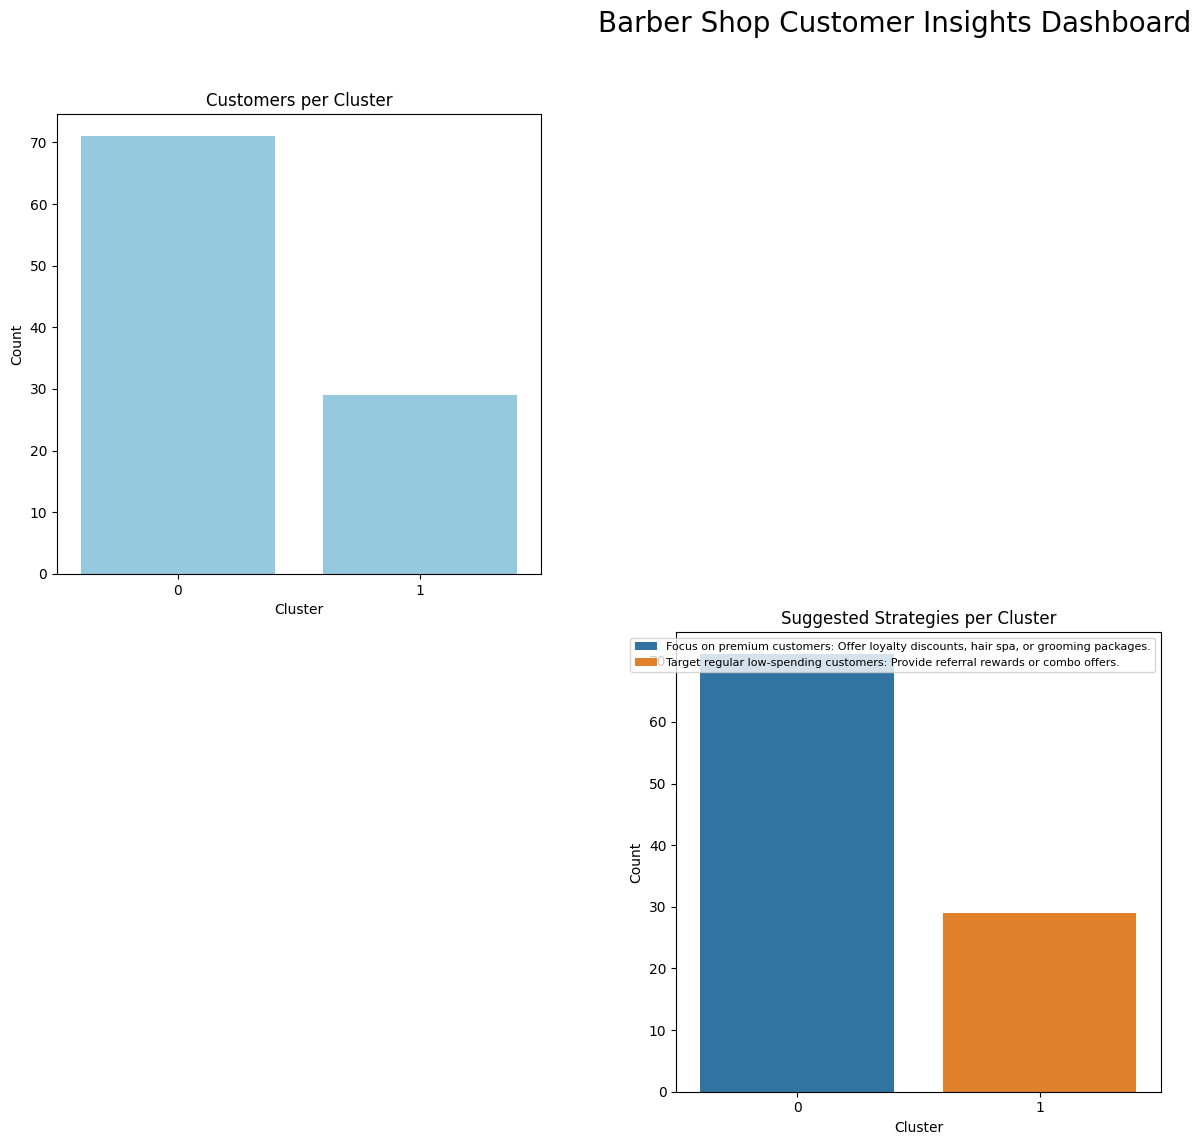

In [11]:
# ----------------------------
# Import Libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ----------------------------
# 1️⃣ Load the dataset
# ----------------------------
file_path = '/content/drive/MyDrive/dataanalyst/barber_shop_with_strategies.csv'
df = pd.read_csv(file_path)

# ----------------------------
# 2️⃣ Clean column names
# ----------------------------
# Remove spaces and parentheses
df.columns = df.columns.str.replace(r'[\s\(\)]', '', regex=True)
# Convert all to lowercase for consistency
df.columns = df.columns.str.lower()

# ----------------------------
# 3️⃣ Verify / Create cluster column
# ----------------------------
if 'cluster' not in df.columns:
    # Use 'turnovert' for clustering (previously 'Turnover (t)')
    if 'turnovert' not in df.columns:
        raise KeyError("No turnover column found. Check your CSV for the correct column name.")

    kmeans = KMeans(n_clusters=2, random_state=42)
    df['cluster'] = kmeans.fit_predict(df[['turnovert']])

# Convert cluster to string for plotting
df['cluster'] = df['cluster'].astype(str)

# ----------------------------
# 4️⃣ Dashboard Visualization
# ----------------------------
plt.figure(figsize=(18,12))
plt.suptitle('Barber Shop Customer Insights Dashboard', fontsize=20, y=0.95)

# 1️⃣ Cluster Distribution
plt.subplot(2,3,1)
sns.countplot(data=df, x='cluster', color='skyblue')  # Fixed warning
plt.title('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# 2️⃣ Turnover by Day Type
if 'type' in df.columns:
    plt.subplot(2,3,2)
    sns.barplot(data=df, x='type', y='turnovert', palette='coolwarm')
    plt.title('Average Turnover by Day Type')
    plt.xlabel('Day Type')
    plt.ylabel('Turnover')

# 3️⃣ Turnover vs Day of Week
if 'dayofweek' in df.columns:
    plt.subplot(2,3,3)
    sns.lineplot(data=df, x='dayofweek', y='turnovert', marker='o', hue='cluster', palette='tab10')
    plt.title('Turnover Trend Across Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Turnover')
    plt.legend(title='Cluster', bbox_to_anchor=(1,1))

# 4️⃣ Customer Type vs Cluster
if 'customertype' in df.columns:
    plt.subplot(2,3,4)
    sns.countplot(data=df, x='customertype', hue='cluster', palette='Set1')
    plt.title('Customer Type per Cluster')
    plt.xlabel('Customer Type')
    plt.ylabel('Count')
    plt.legend(title='Cluster')

# 5️⃣ Suggested Strategies per Cluster
if 'suggestedstrategy' in df.columns:
    plt.subplot(2,3,5)
    strategy_counts = df.groupby(['cluster', 'suggestedstrategy']).size().reset_index(name='count')
    sns.barplot(data=strategy_counts, x='cluster', y='count', hue='suggestedstrategy', dodge=False)
    plt.title('Suggested Strategies per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(loc='upper right', fontsize=8)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()